In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [2]:
housing = pd.read_csv("../data/results/results_cleaned.csv")
housing.head(3)

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area (m2),building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_name          7609 non-null   object
 1   location            7609 non-null   object
 2   bedroom_count       7609 non-null   int64 
 3   bathroom_count      7609 non-null   int64 
 4   carport_count       7609 non-null   int64 
 5   price               7609 non-null   int64 
 6   land_area (m2)      7609 non-null   int64 
 7   building_area (m2)  7609 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 475.7+ KB


Note that we have two data types, which are strings (house_name and location), otherwise it's integers

In [4]:
housing["location"].value_counts()


location
Bojongloa Kidul, Bandung     418
Mandalajati, Bandung         380
Cicendo, Bandung             379
Arcamanik, Bandung           361
Cibiru, Bandung              361
Andir, Bandung               360
Lengkong, Bandung            342
Astanaanyar, Bandung         342
Buah Batu, Bandung           323
Babakanciparay, Bandung      323
Bandung Wetan, Bandung       323
Batununggal, Bandung         323
Cidadap, Bandung             311
Bandung Kidul, Bandung       253
Sumurbandung, Bandung        247
Regol, Bandung               247
Rancasari, Bandung           247
Antapani, Bandung            247
Kiaracondong, Bandung        228
Bandung Kulon, Bandung       228
Ujungberung, Bandung         228
Sukasari, Bandung            209
Panyileukan, Bandung         207
Gede Bage, Bandung           190
Coblong, Bandung             190
Sukajadi, Bandung            190
Cibeunying Kidul, Bandung    152
Name: count, dtype: int64

In [5]:
print(len(housing["location"].value_counts()))

27


Note that we have 27 different districs in Bandung with different value.

In [6]:
housing.describe()

,bedroom_count,bathroom_count,carport_count,price,land_area (m2),building_area (m2)
count,7609.000000,7609.000000,7609.000000,7.609000e+03,7609.000000,7.609000e+03
mean,4.476935,3.196478,1.374688,4.981947e+09,274.553949,6.424599e+02
std,4.712505,4.104819,1.928083,1.476257e+10,440.553799,3.445898e+04
min,0.000000,0.000000,0.000000,1.200000e+07,6.000000,-2.500000e+02
25%,3.000000,2.000000,0.000000,1.150000e+09,102.000000,1.000000e+02
50%,4.000000,3.000000,1.000000,2.250000e+09,165.000000,1.800000e+02
75%,5.000000,3.000000,2.000000,4.750000e+09,313.000000,3.000000e+02
max,99.000000,99.000000,40.000000,7.350000e+11,11850.000000,3.006000e+06


In [7]:
housing.loc[(housing["bedroom_count"]>= 40)]

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area (m2),building_area (m2)
426,Hotel Aktif Bintang 3 Furnished Dekat Alun Alu...,"Astanaanyar, Bandung",53,60,40,50000000000,1100,3000
472,MURAH! KOST KOPO IMANUEL MAINROAD,"Astanaanyar, Bandung",43,12,3,5500000000,474,1000
686,Dijual hotel mewah aktif strategis Astanaanyar,"Astanaanyar, Bandung",53,60,40,50000000000,1100,3000
1327,Jual Hotel Aktif bandung 50 Kmr,"Bandung Kidul, Bandung",50,50,0,28000000000,1000,1700
1359,Hotel / Guest House Ala Kekinian & Instagramab...,"Bandung Kidul, Bandung",50,50,0,28000000000,1000,1700
1362,Hotel Airy Logam Bandung,"Bandung Kidul, Bandung",50,50,10,28000000000,1000,1700
1377,Villa Ex Hotel 2 Lantai Di Kujangsari Bandung ...,"Bandung Kidul, Bandung",50,50,10,32000000000,1000,1700
1402,Hotel di Bandung Jl Logam Lokasi Strategis,"Bandung Kidul, Bandung",50,50,0,32000000000,1000,1700
1418,Di jual hotel di bandung lt 1000 lb 1700 rapi...,"Bandung Kidul, Bandung",50,50,0,24500000000,1000,1700
1429,"Dijual Hotel AIRY murah di Kujangsari, Bandung","Bandung Kidul, Bandung",50,50,0,26000000000,1000,1700


In [8]:
housing.loc[(housing["bathroom_count"]>= 40)]

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area (m2),building_area (m2)
426,Hotel Aktif Bintang 3 Furnished Dekat Alun Alu...,"Astanaanyar, Bandung",53,60,40,50000000000,1100,3000
686,Dijual hotel mewah aktif strategis Astanaanyar,"Astanaanyar, Bandung",53,60,40,50000000000,1100,3000
1327,Jual Hotel Aktif bandung 50 Kmr,"Bandung Kidul, Bandung",50,50,0,28000000000,1000,1700
1359,Hotel / Guest House Ala Kekinian & Instagramab...,"Bandung Kidul, Bandung",50,50,0,28000000000,1000,1700
1362,Hotel Airy Logam Bandung,"Bandung Kidul, Bandung",50,50,10,28000000000,1000,1700
1377,Villa Ex Hotel 2 Lantai Di Kujangsari Bandung ...,"Bandung Kidul, Bandung",50,50,10,32000000000,1000,1700
1402,Hotel di Bandung Jl Logam Lokasi Strategis,"Bandung Kidul, Bandung",50,50,0,32000000000,1000,1700
1418,Di jual hotel di bandung lt 1000 lb 1700 rapi...,"Bandung Kidul, Bandung",50,50,0,24500000000,1000,1700
1429,"Dijual Hotel AIRY murah di Kujangsari, Bandung","Bandung Kidul, Bandung",50,50,0,26000000000,1000,1700
1529,"Rumah Kost Jual Bandung Kidul, Bandung Jawa Barat","Bandung Kidul, Bandung",50,50,0,28000000000,1000,1700


In [9]:
housing.loc[(housing["carport_count"]>= 40)]

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area (m2),building_area (m2)
426,Hotel Aktif Bintang 3 Furnished Dekat Alun Alu...,"Astanaanyar, Bandung",53,60,40,50000000000,1100,3000
686,Dijual hotel mewah aktif strategis Astanaanyar,"Astanaanyar, Bandung",53,60,40,50000000000,1100,3000


Note that we have several outliers. This is because the website had missmatched category. Originally we only want housing data, not a hotel or a sharehome (kos-kosan).

To clean this, we need to delete this data. But before that, we want to see the distribution for each variable

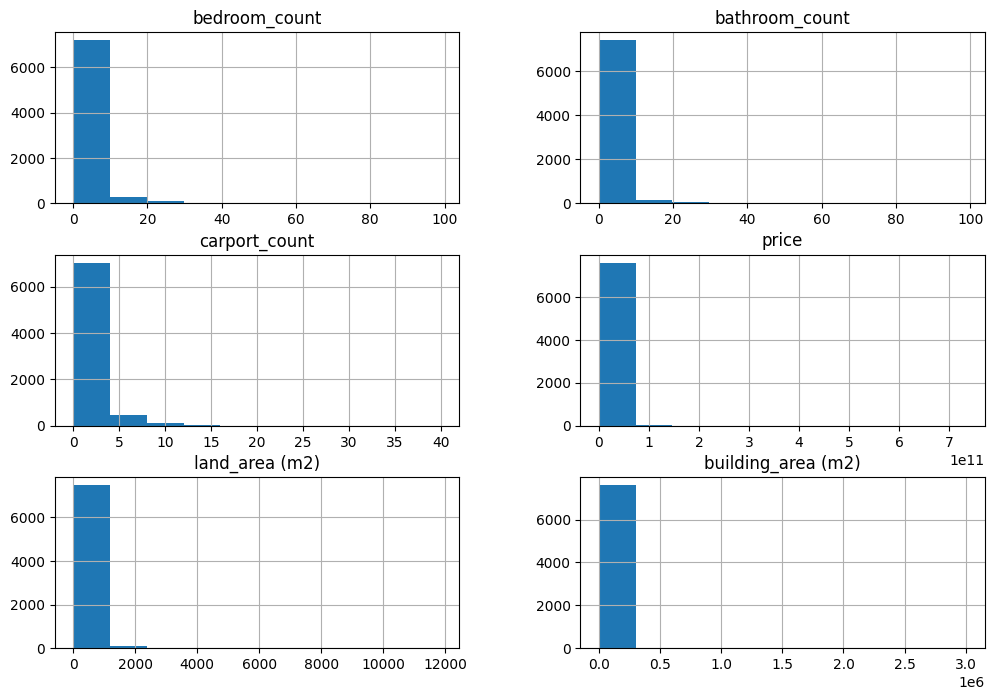

In [10]:
housing.hist(figsize=(12,8))
plt.show()

In [11]:
housing['bedroom_count'].value_counts()

bedroom_count
3     2144
4     1734
2     1308
5      870
6      396
7      263
0      198
8      109
1      106
9       67
10      52
12      42
13      40
11      37
20      29
24      27
14      25
15      21
17      20
16      13
22      12
18      11
50      10
19       9
29       7
28       6
21       4
40       4
38       4
37       4
32       3
35       3
44       3
36       3
27       3
26       3
23       3
30       2
53       2
95       1
43       1
34       1
56       1
25       1
31       1
52       1
69       1
63       1
45       1
99       1
46       1
Name: count, dtype: int64

In [12]:
housing['bedroom_count'].value_counts()

bedroom_count
3     2144
4     1734
2     1308
5      870
6      396
7      263
0      198
8      109
1      106
9       67
10      52
12      42
13      40
11      37
20      29
24      27
14      25
15      21
17      20
16      13
22      12
18      11
50      10
19       9
29       7
28       6
21       4
40       4
38       4
37       4
32       3
35       3
44       3
36       3
27       3
26       3
23       3
30       2
53       2
95       1
43       1
34       1
56       1
25       1
31       1
52       1
69       1
63       1
45       1
99       1
46       1
Name: count, dtype: int64

In [15]:
housing.describe()

,bedroom_count,bathroom_count,carport_count,price,land_area (m2),building_area (m2)
count,7609.000000,7609.000000,7609.000000,7.609000e+03,7609.000000,7.609000e+03
mean,4.476935,3.196478,1.374688,4.981947e+09,274.553949,6.424599e+02
std,4.712505,4.104819,1.928083,1.476257e+10,440.553799,3.445898e+04
min,0.000000,0.000000,0.000000,1.200000e+07,6.000000,-2.500000e+02
25%,3.000000,2.000000,0.000000,1.150000e+09,102.000000,1.000000e+02
50%,4.000000,3.000000,1.000000,2.250000e+09,165.000000,1.800000e+02
75%,5.000000,3.000000,2.000000,4.750000e+09,313.000000,3.000000e+02
max,99.000000,99.000000,40.000000,7.350000e+11,11850.000000,3.006000e+06


In [17]:
# we waant to check negative values that occur on building area variable
housing.loc[(housing["building_area (m2)"]<= 0)]

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area (m2),building_area (m2),category
2514,Rumah Cantik 2 lantai di Singgasana Karangkamu...,"Bojongloa Kidul, Bandung",4,3,2,3350000000,200,-250,rumah
2666,Rumah Cantik 2 lantai di Singgasana Karangkamu...,"Bojongloa Kidul, Bandung",4,3,2,3350000000,200,-250,rumah


Because it doesn't make any sense, we would remove those instances.

In [18]:
housing.drop(housing.loc[(housing["building_area (m2)"]<= 0)].index, inplace=True)

In [20]:
def categorize_housing(house_name):
    """
    returns category of each items based on it's name
    """
    house_name_cleaned = re.sub(r'[^\w\s]', '', house_name.lower())

    categories = {
        "kos": "kos",
        "rumah": "rumah",
        "hotel": "hotel",
        "ruko": "ruko",
    }

    for category, category_label in categories.items():
        if category.lower() in house_name_cleaned:
            return category

    return "unknown"

categorize_lambda = lambda house_name: categorize_housing(house_name)

housing["category"] = housing["house_name"].apply(categorize_lambda)

housing.loc[(housing["category"] == "kos")]
    


,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area (m2),building_area (m2),category
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176,kos
54,Rumah ex kos2 an jl Maleber Barat,"Andir, Bandung",5,3,0,400000000,56,95,kos
96,Rumah Kost 3 Lantai Di Ciroyom Andir Bandung,"Andir, Bandung",11,5,0,2250000000,163,300,kos
144,Jual rumah untuk kost Sayap Rajawali 2 lantai,"Andir, Bandung",7,3,1,2100000000,140,300,kos
149,Rumah Daerah Maleber Cocok Untuk Tempat Usaha ...,"Andir, Bandung",5,4,1,2000000000,170,350,kos
...,...,...,...,...,...,...,...,...,...
7241,Kostan/ Kontrakan aktif di ujung berung dekat ...,"Ujungberung, Bandung",13,12,3,2500000000,374,250,kos
7280,Rumah Kost Luas Murah di Pasir Impun Bandung,"Ujungberung, Bandung",17,17,4,6800000000,782,604,kos
7500,Rumah Cocok Dijadikan Kantor Maupun Kost di Si...,"Babakanciparay, Bandung",7,4,3,4650000000,300,300,kos
7509,RUMAH DAN KOST MAINROAD SOEKARNO HATTA DEKAT D...,"Babakanciparay, Bandung",15,15,0,22000000000,715,550,kos


In [21]:
from pathlib import Path

def export_dataset(dataset):
    data_path = Path("../data/results/results_cleaned_categorized.csv")
    
    dataset.to_csv(data_path, index=False)

export_dataset(housing)